<a href="https://colab.research.google.com/github/naveen-ramavath/machine-learning/blob/main/assaignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

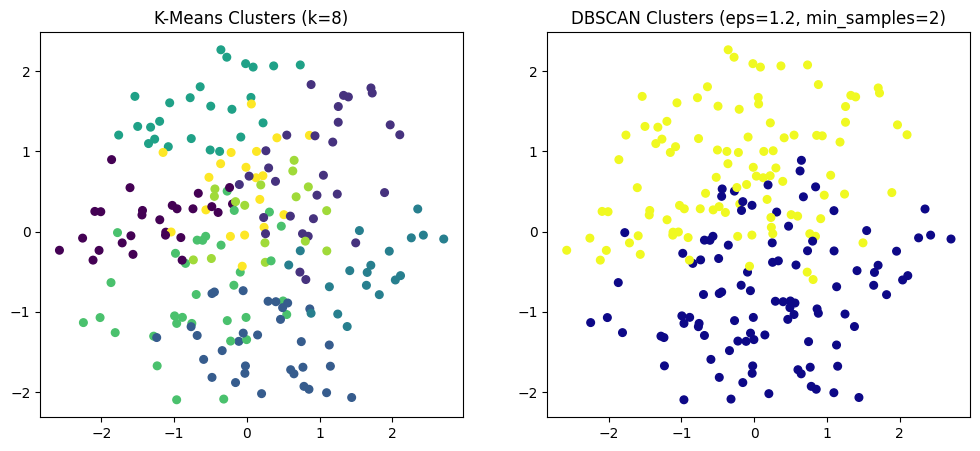

✅ Results Summary
Best K for KMeans: 8
Best Silhouette (KMeans): 0.294
Best Silhouette (DBSCAN): 0.2625829803010868
Best DBSCAN Params: (np.float64(1.2), 2)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

# Simulated Mall Customers dataset
data = {
    "CustomerID": range(1, 201),
    "Gender": np.random.choice(["Male", "Female"], 200),
    "Age": np.random.randint(18, 70, 200),
    "Annual Income (k$)": np.random.randint(15, 150, 200),
    "Spending Score (1-100)": np.random.randint(1, 100, 200)
}
df = pd.DataFrame(data)

# Encode categorical
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

X = df[["Gender", "Age", "Annual Income (k$)", "Spending Score (1-100)"]]

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------- K-Means -------------------- #
silhouette_scores = []
dbi_scores = []
k_values = range(2, 9)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    dbi_scores.append(davies_bouldin_score(X_scaled, labels))

best_k = k_values[np.argmax(silhouette_scores)]
kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10).fit(X_scaled)
kmeans_labels = kmeans_best.labels_

# -------------------- DBSCAN -------------------- #
eps_values = np.arange(0.3, 3.1, 0.3)  # wider eps range
min_samples_values = [2, 3, 5, 8, 10]

best_silhouette = -1
best_params = None
best_labels = None

for eps in eps_values:
    for ms in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=ms)
        labels = dbscan.fit_predict(X_scaled)
        if len(set(labels)) > 1:  # allow noise (-1)
            sil = silhouette_score(X_scaled, labels)
            if sil > best_silhouette:
                best_silhouette = sil
                best_params = (eps, ms)
                best_labels = labels

# -------------------- PCA Visualization -------------------- #
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12,5))

# K-Means Plot
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels, cmap="viridis", s=30)
plt.title(f"K-Means Clusters (k={best_k})")

# DBSCAN Plot
plt.subplot(1,2,2)
if best_labels is not None:
    plt.scatter(X_pca[:,0], X_pca[:,1], c=best_labels, cmap="plasma", s=30)
    plt.title(f"DBSCAN Clusters (eps={best_params[0]}, min_samples={best_params[1]})")
else:
    plt.title("DBSCAN found no valid clusters")

plt.show()

# -------------------- Results -------------------- #
print("✅ Results Summary")
print(f"Best K for KMeans: {best_k}")
print(f"Best Silhouette (KMeans): {max(silhouette_scores):.3f}")
print(f"Best Silhouette (DBSCAN): {best_silhouette if best_labels is not None else 'No valid clusters'}")
print(f"Best DBSCAN Params: {best_params if best_labels is not None else 'N/A'}")
